# 9. Mixture Models and EM

### *Table of Contents*

* 9.1 [K-means Clustering](#9.1-K-means-Clustering)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from prml.clustering import KMeans
from prml.datasets import load_old_faithful

# Set random seed to make deterministic
np.random.seed(0)

# Ignore zero divisions and computation involving NaN values.
np.seterr(divide="ignore", invalid="ignore")

# Enable higher resolution plots
%config InlineBackend.figure_format = 'retina'

# Enable autoreload all modules before executing code
%reload_ext autoreload
%autoreload 2

## 9.1 K-means Clustering

Consider the problem of identifying groups, or clusters, of data points in a multidimensional space. Suppose that we have a data set $\{x_1,\dots,x_N\}$. The goal is to partition the data set into $K$ clusters, for a given value of $K$. Intuitively, a cluster can be a group of data points whose inter-point distances are small compared to the distances to points outside the cluster.

We can formalize this notion by introducing a set of D-dimensional vectors $\boldsymbol\mu_k$. Each such vector is a prototype associated with the $k$th cluster, essentially representing the centres of the clusters. Then, the goal is then to find an assignment of data points to clusters, and a set of vectors $\boldsymbol\mu_k$, such that the sum of the squares of the distances of each data point to its closest vector $\boldsymbol\mu_k$ is a minimum.

We can then define an objective function, sometimes called a distortion measure, given by

$$
J = \sum_{n=1}^N\sum_{m=1}^M r_{nk}||\mathbf{x}_n - \boldsymbol\mu_k||_2^2
$$

where $r_{nk} \in \{0, 1\}$ are binary indicator variables, describing which of the $K$ clusters the data point $x_n$ is assigned. The objective function represents the sum of the squares of the distances of each data point to its assigned cluster center $\boldsymbol\mu_k$. Thus, the goal is to find values for the $\{r_{nk}\}$ and the ${\boldsymbol\mu_k}$ that minimize $J$.

**K-means algorithm:**
> This can be achieved using an iterative procedure involving two successive steps. In the first phase we minimize $J$ with respect to the $r_{nk}$, keeping the $\boldsymbol\mu_k$ fixed. In the second phase we minimize $J$ with respect to the $\boldsymbol\mu_k$, keeping $r_{nk}$ fixed. These two stages are then repeated until convergence. We shall see that these two stages of updating $r_{nk}$ and updating $\boldsymbol\mu_k$ correspond respectively to the E (expectation) and M (maximization) steps of the EM algorithm.

Consider the determination of the $r_{nk}$. Because $J$ is a linear function of $r_{nk}$, the optimization gives a closed form solution. The $n$ terms are independent and so we optimize for each $n$ separately by choosing $r_{nk}$ to be 1 for whichever value of $k$ gives the minimum value of $||\mathbf{x}_n - \boldsymbol\mu_k||_2^2$. In other words, we simply assign each data point to its closest cluster centre or more formally,

$$
r_{nk} = 
\begin{cases}
1 & \text{if} \; k = \argmin_j ||\mathbf{x}_n - \boldsymbol\mu_j||_2^2 \\
0 & \text{otherwise}
\end{cases}
$$

Then, consider the optimization of $\boldsymbol\mu_k$, while keeping $r_{nk}$ fixed. The objective function is a quadratic function of $\boldsymbol\mu_k$, and it can be minimized by setting its
derivative with respect to $\boldsymbol\mu_k$ to zero giving,

$$
\begin{aligned}
& \frac{\partial J}{\partial\boldsymbol\mu_k} = \mathbf{0} \Leftrightarrow \\
& \frac{\partial}{\partial\boldsymbol\mu_k} \sum_{n=1}^N\sum_{m=1}^M r_{nk}||\mathbf{x}_n - \boldsymbol\mu_k||_2^2 = \mathbf{0} \Leftrightarrow \\
& 2 \sum_{n=1}^N r_{nk}(\mathbf{x}_n - \boldsymbol\mu_k) = \mathbf{0} \Leftrightarrow \\
& \sum_{n=1}^N r_{nk}\mathbf{x}_n - \sum_{n=1}^N r_{nk}\boldsymbol\mu_k = \mathbf{0} \Leftrightarrow \\
& \sum_{n=1}^N r_{nk}\mathbf{x}_n = \sum_{n=1}^N r_{nk}\boldsymbol\mu_k \Leftrightarrow \\
& \boldsymbol\mu_k = \frac{\sum_{n=1}^N r_{nk}\mathbf{x}_n}{\sum_{n=1}^N r_{nk}}
\end{aligned}
$$

The denominator is equal to the number of points assigned to cluster $k$, and thus, $\boldsymbol\mu_k$ equal to the mean of all of the data points $\mathbf{x}_n$ assigned to cluster $k$. For this reason, the procedure is known as the $K$-means algorithm.

> Because each phase reduces the value of the objective function, convergence of the algorithm is assured. However, keep in mind, that it may converge to a local rather than global minimum.

Below the $K$-means algorithm is applied on the Old Faithful data set:

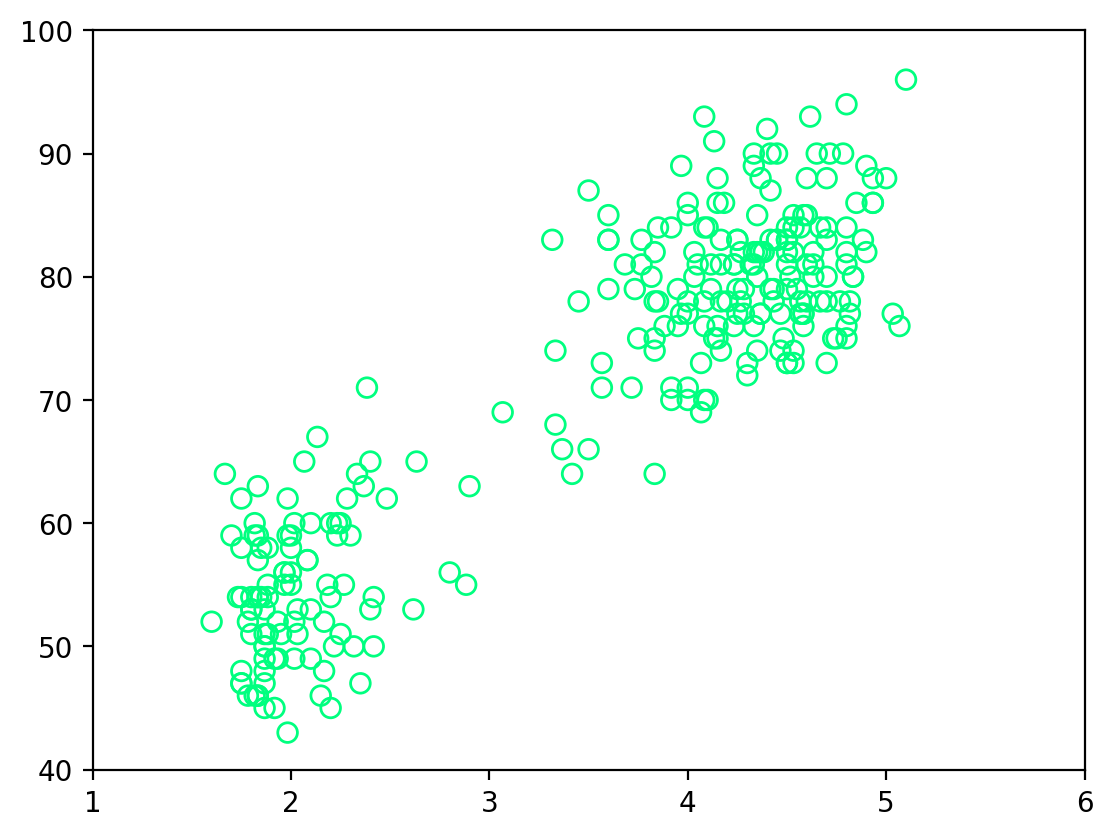

In [8]:
old_faithful = load_old_faithful()
plt.scatter(old_faithful[:, :1], old_faithful[:, 1:2], color="springgreen", facecolors="none", s=50)
plt.xlim(1, 6)
plt.ylim(40, 100)
plt.show()

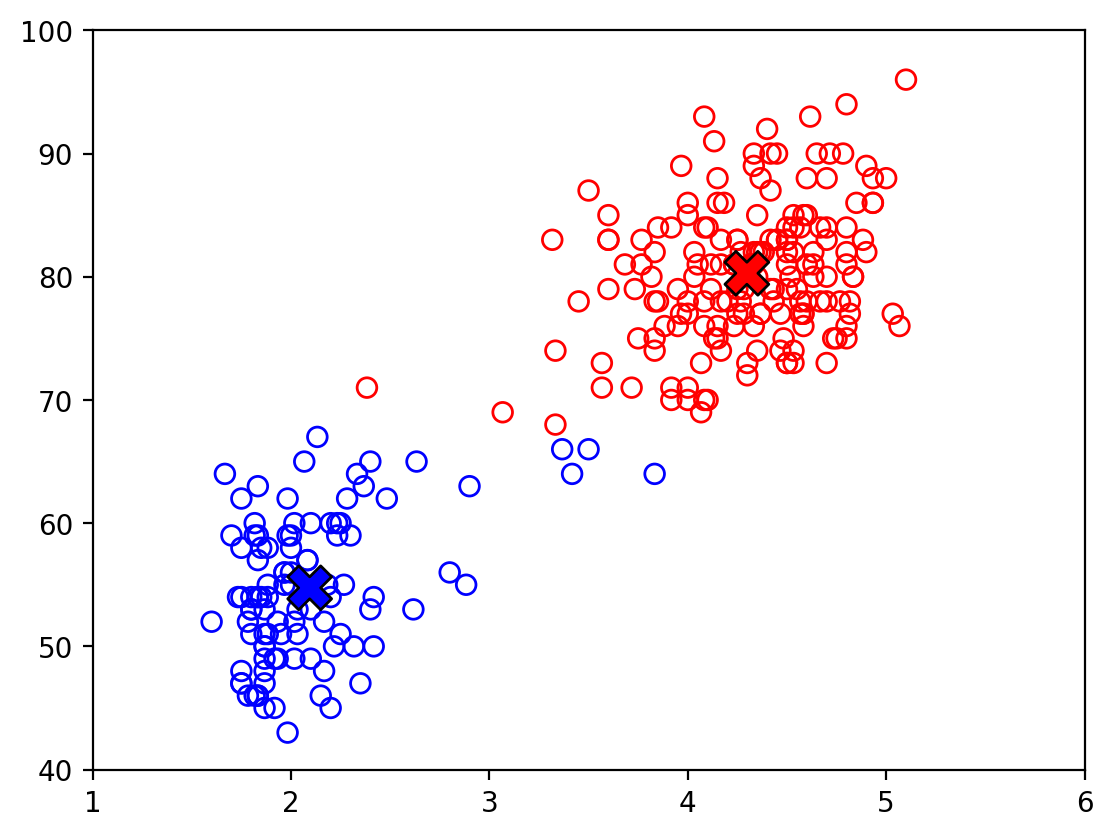

In [79]:
model = KMeans(2)
model.fit(old_faithful, n_iter=10)
classes = model.predict(old_faithful)

plt.scatter(old_faithful[:, :1], old_faithful[:, 1:2], edgecolors=np.where(classes == 0, "blue", "red"), facecolors="none", s=50)
plt.scatter(model.centers[:, 0], model.centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
plt.xlim(1, 6)
plt.ylim(40, 100)
plt.show()

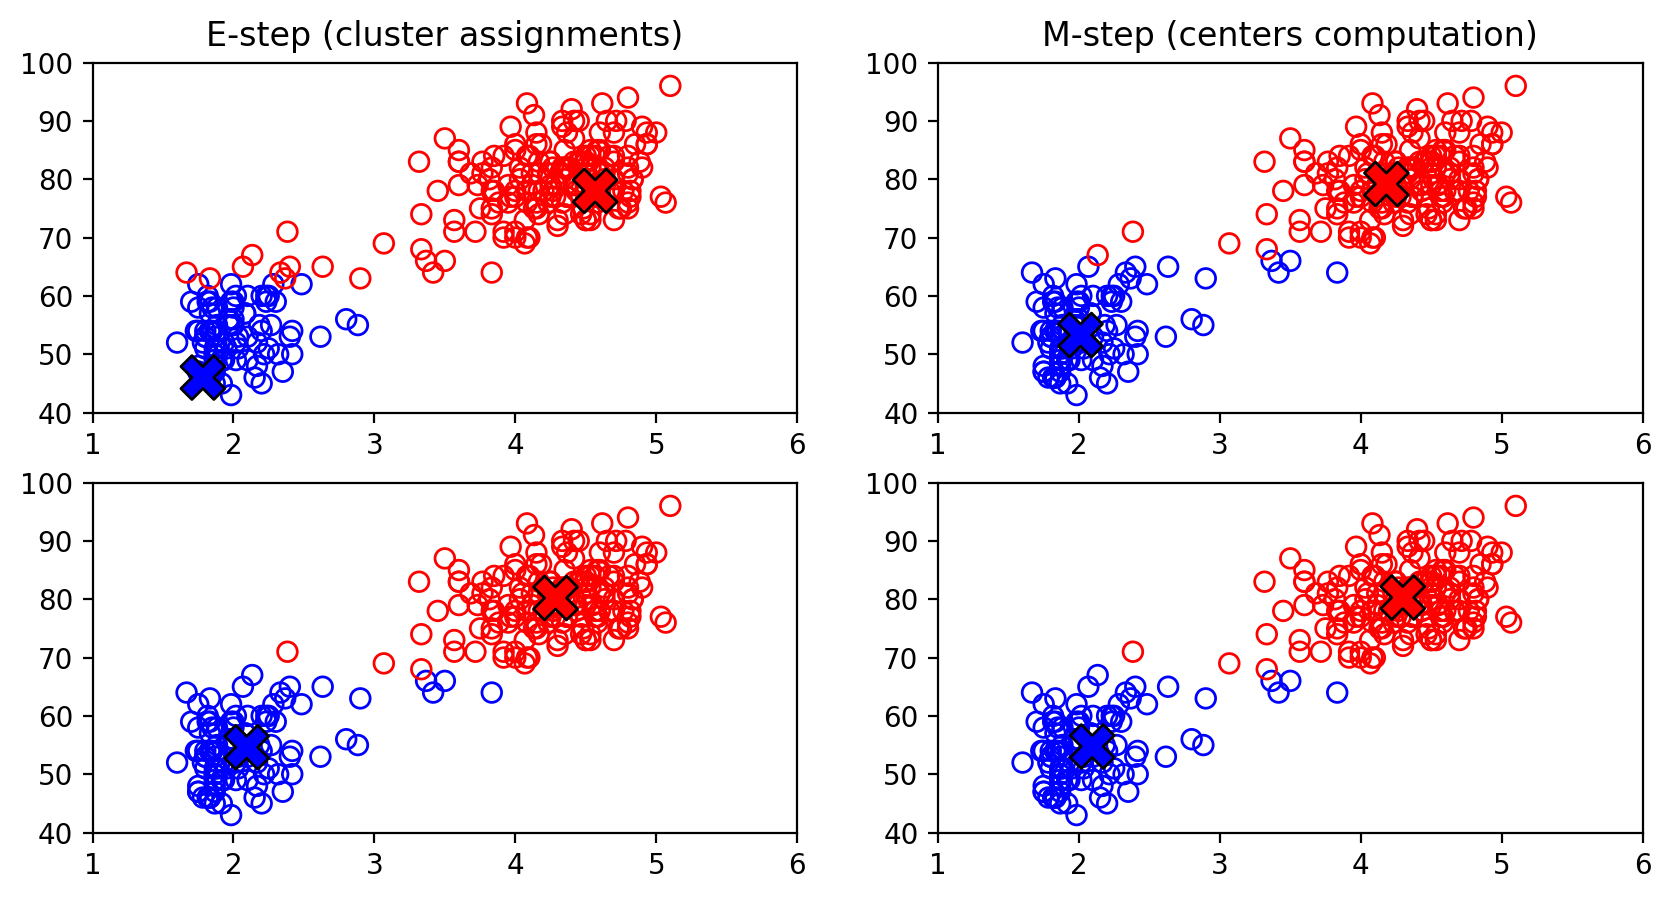

In [80]:
plt.figure(figsize=(10, 5))

# even are E-steps and odd are M-steps
for i, (centers, assignments) in enumerate(model.history):
    plt.subplot(2, 2, i + 1)
    plt.scatter(old_faithful[:, :1], old_faithful[:, 1:2], edgecolors=np.where(assignments == 0, "blue", "red"), facecolors="none", s=50)
    plt.scatter(centers[:, 0], centers[:, 1], color=["blue", "red"], marker="X", s=250, edgecolors="black")
    plt.xlim(1, 6)
    plt.ylim(40, 100)
    
    if i == 0:
        plt.title("E-step (cluster assignments)")
    elif i == 1:
        plt.title("M-step (centers computation)")